In [1]:
# importing the necessary libraries:
import warnings
warnings.filterwarnings("ignore")
import anndata as ad
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scrublet as scr
import leidenalg

In [4]:
adata = sc.read_h5ad("wound_with_annotation.h5ad") 
adata.obs

,time_point,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,...,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,n_counts,n_genes,doublet_scores,predicted_doublets,leiden,cell_type
Wound_56_1,24hr,874,6.774224,4393,8.387995,50.899158,62.212611,74.527658,91.486456,98,...,0.0,0,0.000000,0.000000,4392,873,0.009360,False,1,Neutrophils
Wound_65_1,24hr,1520,7.327123,4938,8.504918,27.521264,36.978534,50.324018,72.235723,28,...,0.0,0,0.000000,0.000000,4938,1520,0.081721,False,0,Neutrophils
Wound_67_1,24hr,750,6.621406,2283,7.733684,36.224266,49.102059,65.440210,89.049496,3,...,0.0,1,0.693147,0.043802,2283,750,0.011025,False,1,Neutrophils
Wound_413_1,24hr,831,6.723832,2228,7.709308,33.662478,45.960503,61.445242,85.143627,20,...,0.0,0,0.000000,0.000000,2228,831,0.102575,False,1,Neutrophils
Wound_420_1,24hr,1170,7.065613,5006,8.518592,36.675989,49.660408,63.503795,83.120256,48,...,0.0,0,0.000000,0.000000,5006,1170,0.066428,False,1,Neutrophils
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wound_56604727_2,Blood,1473,7.295735,4036,8.303257,31.714569,41.303271,53.295342,72.770069,32,...,0.0,0,0.000000,0.000000,4036,1473,0.016182,False,0,Neutrophils
Wound_56612629_2,Blood,3017,8.012350,8779,9.080232,22.166534,29.798383,39.697004,56.282037,598,...,0.0,0,0.000000,0.000000,8779,3017,0.049353,False,2,Monocytes
Wound_56613378_2,Blood,1519,7.326466,2659,7.886081,21.436630,29.334336,40.203084,61.677322,107,...,0.0,0,0.000000,0.000000,2659,1519,0.052499,False,4,T cells
Wound_56614974_2,Blood,2608,7.866722,6521,8.782936,18.386750,26.882380,37.892961,55.896335,249,...,0.0,0,0.000000,0.000000,6521,2608,0.006381,False,3,Monocytes


In [5]:
# Count the number of each cell type
cell_type_counts = adata.obs['cell_type'].value_counts()

# Print the result
print(cell_type_counts)

cell_type
Neutrophils          11036
Monocytes             2382
T cells               1162
Macrophages            611
Epithelial cells       450
Basophils              214
B cells                100
Endothelial cells       53
Dendritic cells         33
Name: count, dtype: int64


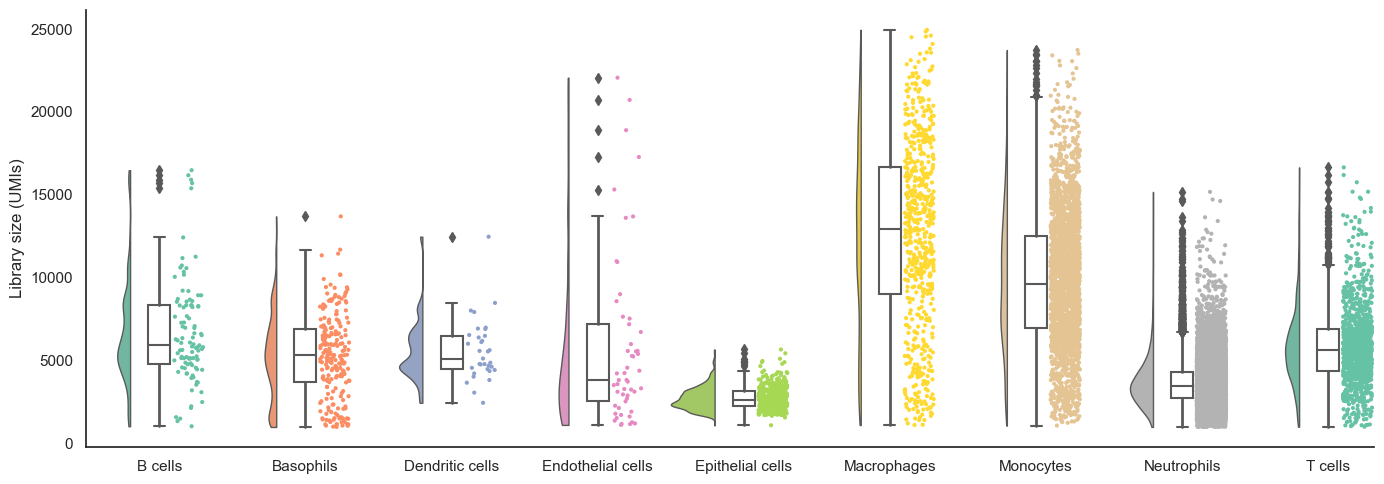

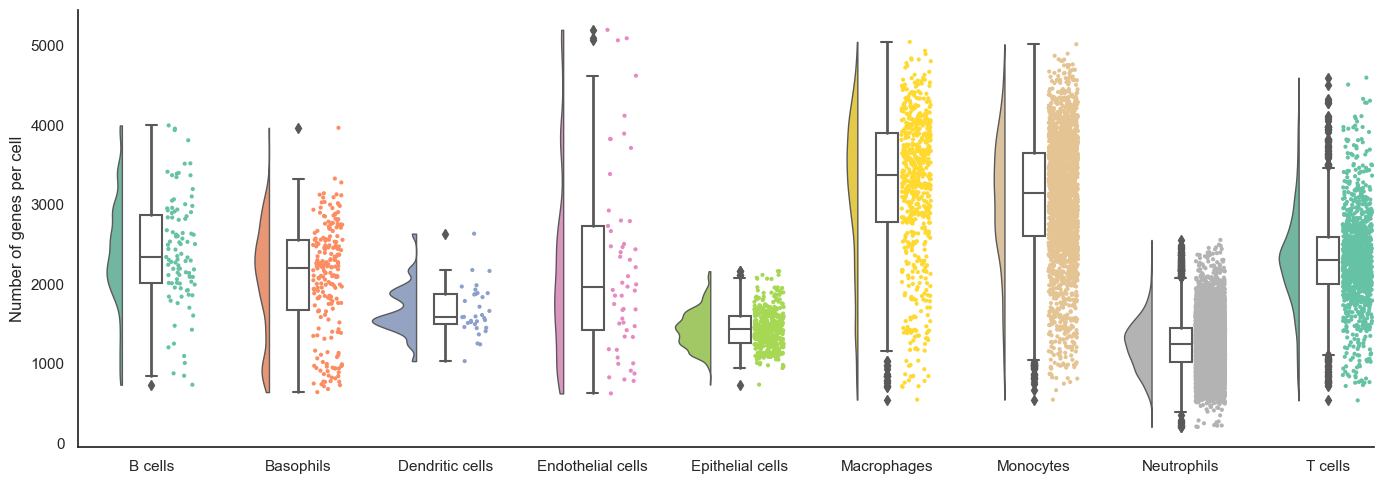

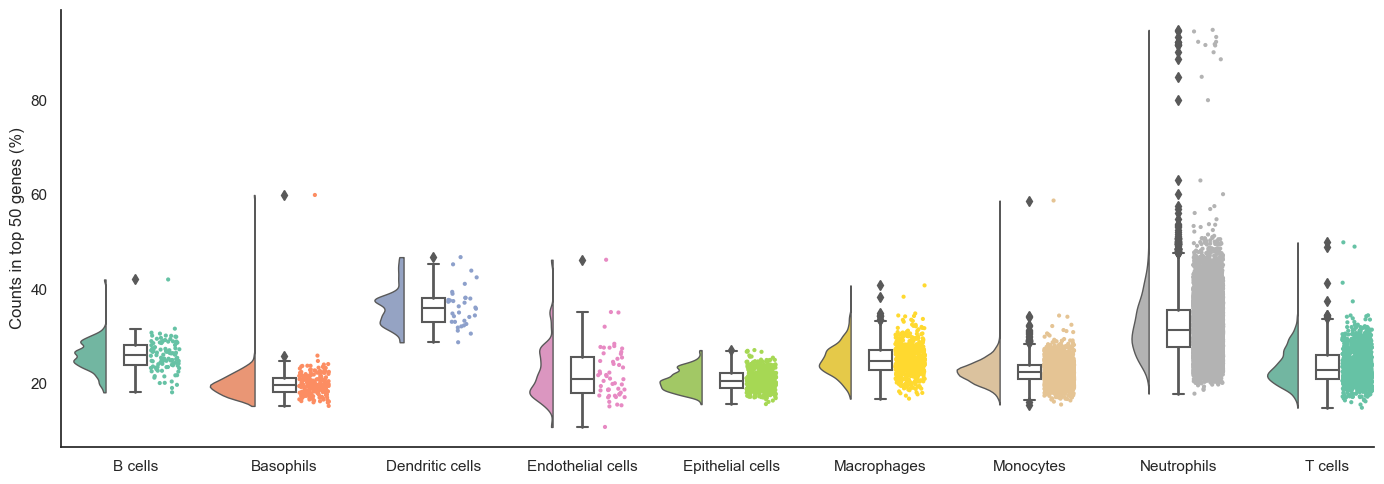

In [10]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import ptitprince as pt
import matplotlib.pyplot as plt

# Load the h5ad file:
adata = sc.read_h5ad("wound_with_annotation.h5ad")

# Extract relevant columns into a DataFrame
df = adata.obs[[
    'cell_type', 
    'total_counts', 
    'n_genes_by_counts', 
    'pct_counts_in_top_50_genes'
]].copy()

# Rename columns for clarity in plots
df = df.rename(columns={
    'total_counts': 'Library size (UMIs)',
    'n_genes_by_counts': 'Number of genes per cell',
    'pct_counts_in_top_50_genes': 'Counts in top 50 genes (%)'
})

# Set plot style
sns.set(style="white")

# Function to make raincloud plots
def plot_raincloud(data, y, title):
    f, ax = plt.subplots(figsize=(14, 5))
    pt.RainCloud(x='cell_type', y=y, data=data, palette="Set2",
                 width_viol=.6, ax=ax, orient='v', move=0.2)
    sns.despine(ax=ax)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('')
    plt.tight_layout()
    plt.show()

# Plot for UMI counts
plot_raincloud(df, 'Library size (UMIs)', '')

# Plot for number of genes per cell
plot_raincloud(df, 'Number of genes per cell','')

# Plot for % counts in top 50 genes
plot_raincloud(df, 'Counts in top 50 genes (%)','')


/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the fut

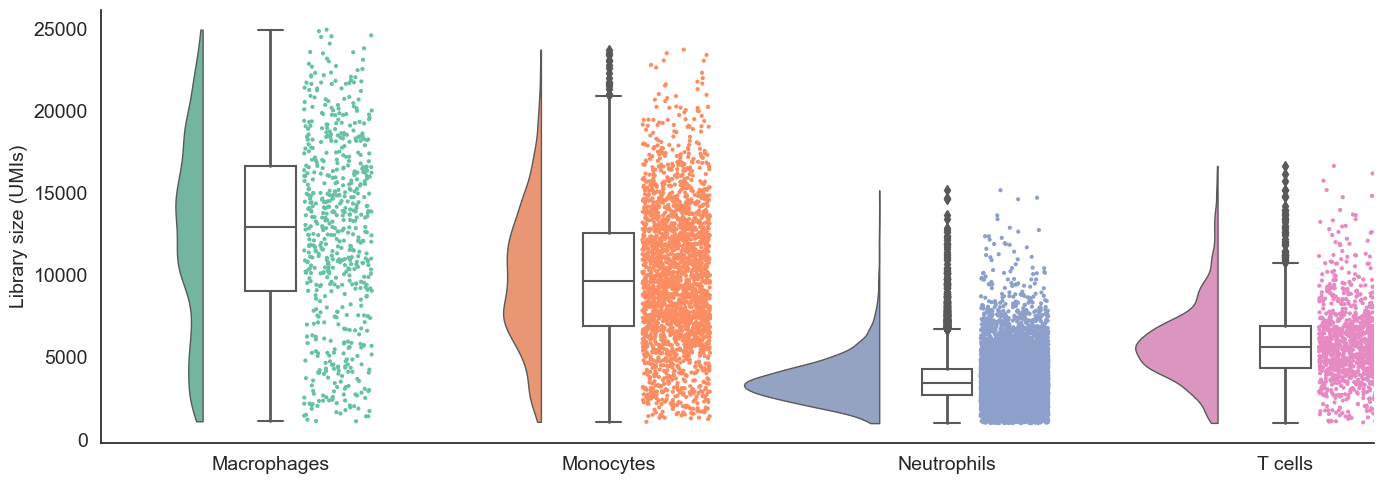

/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the fut

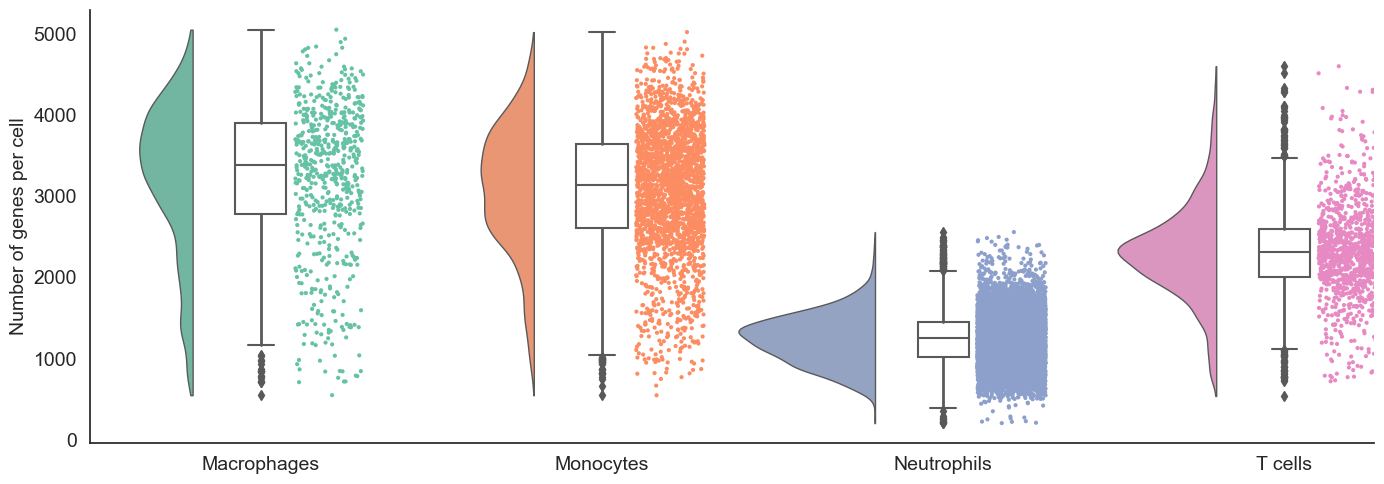

/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the fut

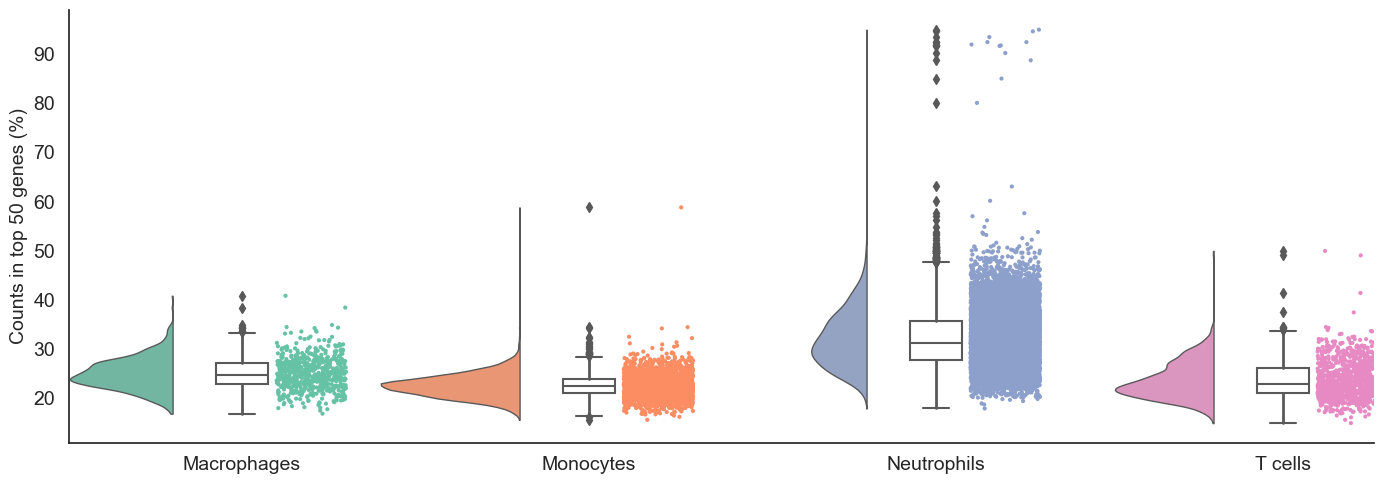

In [6]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import ptitprince as pt
import matplotlib.pyplot as plt

# Load the h5ad file
adata = sc.read_h5ad("wound_with_annotation.h5ad")

# Extract relevant columns into a DataFrame
df = adata.obs[[
    'cell_type', 
    'total_counts', 
    'n_genes_by_counts', 
    'pct_counts_in_top_50_genes'
]].copy()

# Rename columns for clarity in plots
df = df.rename(columns={
    'total_counts': 'Library size (UMIs)',
    'n_genes_by_counts': 'Number of genes per cell',
    'pct_counts_in_top_50_genes': 'Counts in top 50 genes (%)'
})

# Filter out cell types with fewer than 500 cells
cell_type_counts = df['cell_type'].value_counts()
valid_cell_types = cell_type_counts[cell_type_counts >= 500].index
df = df[df['cell_type'].isin(valid_cell_types)]

# Define custom cell type order (immune cells first)
immune_cells = ['B cells', 'Basophils', 'Dendritic cells', 'Macrophages', 'Monocytes', 'Neutrophils', 'T cells']
other_cells = ['Endothelial cells', 'Epithelial cells']
desired_order = immune_cells + other_cells

# Keep only existing cell types in the desired order
existing_order = [ct for ct in desired_order if ct in df['cell_type'].unique()]
df['cell_type'] = pd.Categorical(df['cell_type'], categories=existing_order, ordered=True)

# Set plot style
sns.set(style="white")

# Function to make raincloud plots
def plot_raincloud(data, y, title):
    f, ax = plt.subplots(figsize=(14, 5))
    pt.RainCloud(x='cell_type', y=y, data=data, palette="Set2",
                 width_viol=.6, ax=ax, orient='v', move=0.2)
    sns.despine(ax=ax)
    ax.set_title('', fontsize=14)
    ax.set_xlabel('', fontsize=14)
    ax.set_ylabel(y, fontsize=14)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    plt.tight_layout()
    plt.show()

# Plot for UMI counts
plot_raincloud(df, 'Library size (UMIs)', 'Library Size per Cell Type')

# Plot for number of genes per cell
plot_raincloud(df, 'Number of genes per cell', 'Number of Genes per Cell Type')

# Plot for % counts in top 50 genes
plot_raincloud(df, 'Counts in top 50 genes (%)', 'Percent Counts in Top 50 Genes per Cell Type')


/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the fut

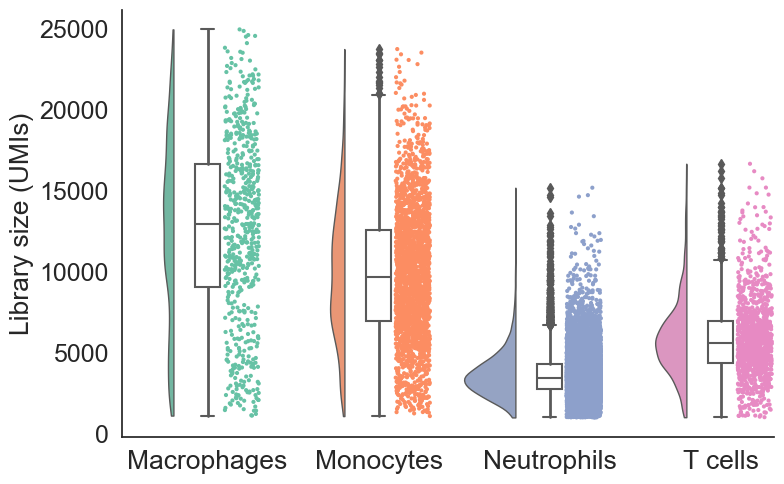

/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the fut

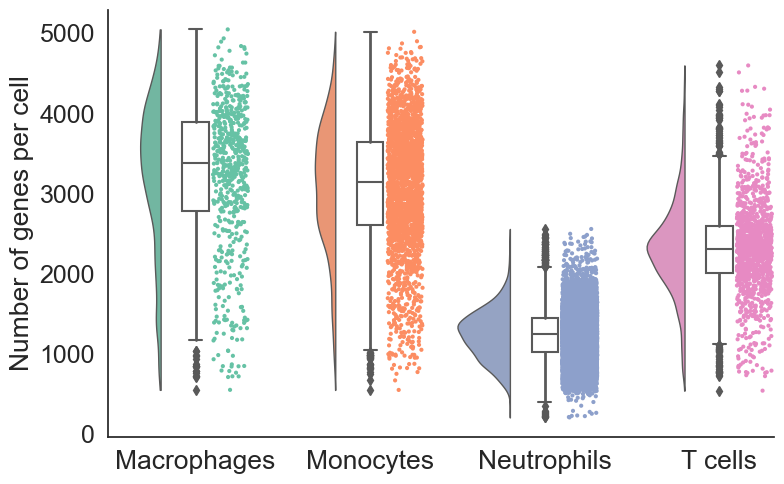

/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the fut

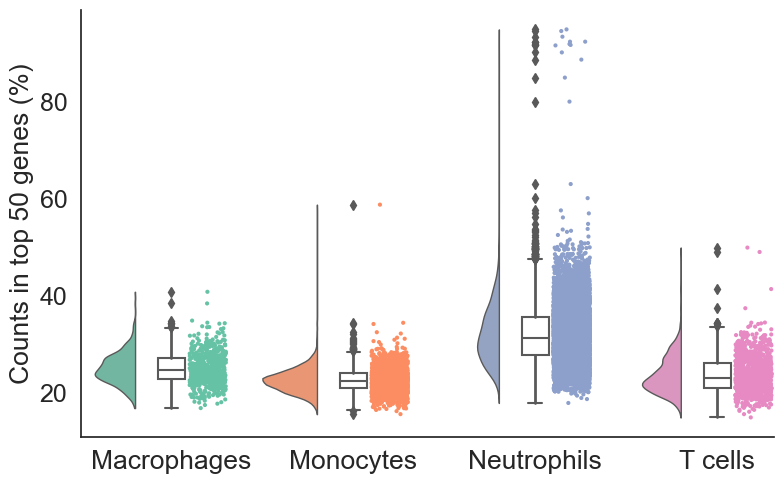

In [28]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import ptitprince as pt
import matplotlib.pyplot as plt

# Load the h5ad file
adata = sc.read_h5ad("wound_with_annotation.h5ad")

# Extract relevant columns into a DataFrame
df = adata.obs[[
    'cell_type', 
    'total_counts', 
    'n_genes_by_counts', 
    'pct_counts_in_top_50_genes'
]].copy()

# Rename columns for clarity in plots
df = df.rename(columns={
    'total_counts': 'Library size (UMIs)',
    'n_genes_by_counts': 'Number of genes per cell',
    'pct_counts_in_top_50_genes': 'Counts in top 50 genes (%)'
})

# Filter out cell types with fewer than 500 cells
cell_type_counts = df['cell_type'].value_counts()
valid_cell_types = cell_type_counts[cell_type_counts >= 500].index
df = df[df['cell_type'].isin(valid_cell_types)]

# Define custom cell type order (immune cells first)
immune_cells = ['B cells', 'Basophils', 'Dendritic cells', 'Macrophages', 'Monocytes', 'Neutrophils', 'T cells']
other_cells = ['Endothelial cells', 'Epithelial cells']
desired_order = immune_cells + other_cells

# Keep only existing cell types in the desired order
existing_order = [ct for ct in desired_order if ct in df['cell_type'].unique()]
df['cell_type'] = pd.Categorical(df['cell_type'], categories=existing_order, ordered=True)

# Set plot style
sns.set(style="white")

# Function to make raincloud plots
def plot_raincloud(data, y, title):
    f, ax = plt.subplots(figsize=(8, 5))
    pt.RainCloud(
        x='cell_type', 
        y=y, 
        data=data, 
        order=existing_order,
        palette="Set2",
        width_viol=.6, 
        ax=ax, 
        orient='v', 
        move=0.2
    )
    sns.despine(ax=ax)
    ax.set_title('', fontsize=19)
    ax.set_xlabel('', fontsize=19)
    ax.set_ylabel(y, fontsize=19)
    ax.tick_params(axis='x', labelsize=19, rotation=0)
    ax.tick_params(axis='y', labelsize=18)
    plt.tight_layout()
    plt.show()

# Plot for UMI counts
plot_raincloud(df, 'Library size (UMIs)', '')

# Plot for number of genes per cell
plot_raincloud(df, 'Number of genes per cell', '')

# Plot for % counts in top 50 genes
plot_raincloud(df, 'Counts in top 50 genes (%)', '')
